<a href="https://colab.research.google.com/github/Erickrus/leetcode/blob/master/NaiveFftCodec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

%matplotlib inline

In [51]:
class NaiveFftCodec:
  def __init__(self):
    self.N = 48 # Number of sample points
    self.T = 1.0 / float(self.N*2.)  # sample spacing

  def encode(self, b):
    bStr = "%8s" % bin(b)[2:]
    bStr = bStr.replace(" ","0")
    print("%d as binary: %s" %(b, bStr))
    x = np.linspace(0.0, self.N*self.T, self.N, endpoint=False)
    y = np.zeros(x.shape)
    f = 2
    for i in range(8):
      if bStr[i] == '1':
        y += np.sin(f * x * 2 * np.pi)
      f += 4
    y = y/ max(abs(np.max(y)), abs(np.min(y)))
    return y

  def decode(self, y):
    yf = fft(y)
    xf = fftfreq(self.N, self.T)[:self.N//2]
    y2f = 2.0 / self.N * np.abs(yf[0:self.N//2])
    b = ['0'] * 8
    bits =  ((xf[y2f>0.25]-2)/4.).tolist()
    for i in bits:
      b[int(i)] = '1'
    b = int( "".join(b), 2)
    return b, xf, 2.0/self.N * np.abs(yf[0:self.N//2])

  def noise(self, y,  maxNoise = 0.01):
    return np.random.uniform(-maxNoise, maxNoise, y.shape)

nfc = NaiveFftCodec()

## Encode
1. encode 1 byte [0-255] to waveform as y

2. plot the waveform

Note: waveform is standarized to [-1., 1.]

99 as binary: 01100011


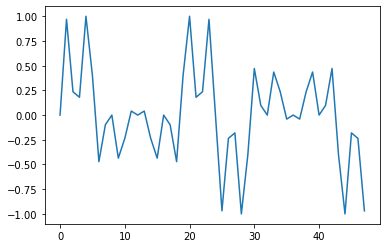

In [52]:
y = nfc.encode(99)
plt.plot(y)
plt.show()

## Add noise
1. random some background noise (+/- 0.2)

2. plot both noise, y, and y + noise

3. add noise to y

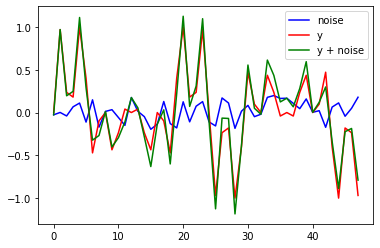

In [53]:
noiseVolume = 0.2
noise = nfc.noise(y, noiseVolume)
plt.plot(noise, color='blue')
plt.plot(y, color='red')
plt.plot(noise + y, color='green')
plt.legend(['noise', 'y', 'y + noise'])
plt.show()
y += noise

## Decode
1. decode waveform - y

2. plot freq vs fft result diagram, each peak represents a bit

decode result: 99


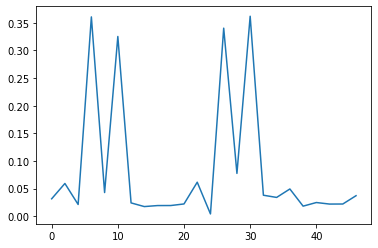

In [54]:
res, xf, yf = nfc.decode(y)

print("decode result: %d" % res)
plt.plot(xf, yf)
plt.show()